<a href="https://colab.research.google.com/github/garyandre1/analisis-exploratorio/blob/master/STemp_XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
plt.style.use("fivethirtyeight")
color_pal = sns.color_palette()

In [5]:
df = pd.read_csv("PJME_hourly.csv")
df = df.set_index("Datetime")
df.index = pd.to_datetime(df.index)

In [11]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


<function matplotlib.pyplot.show(close=None, block=None)>

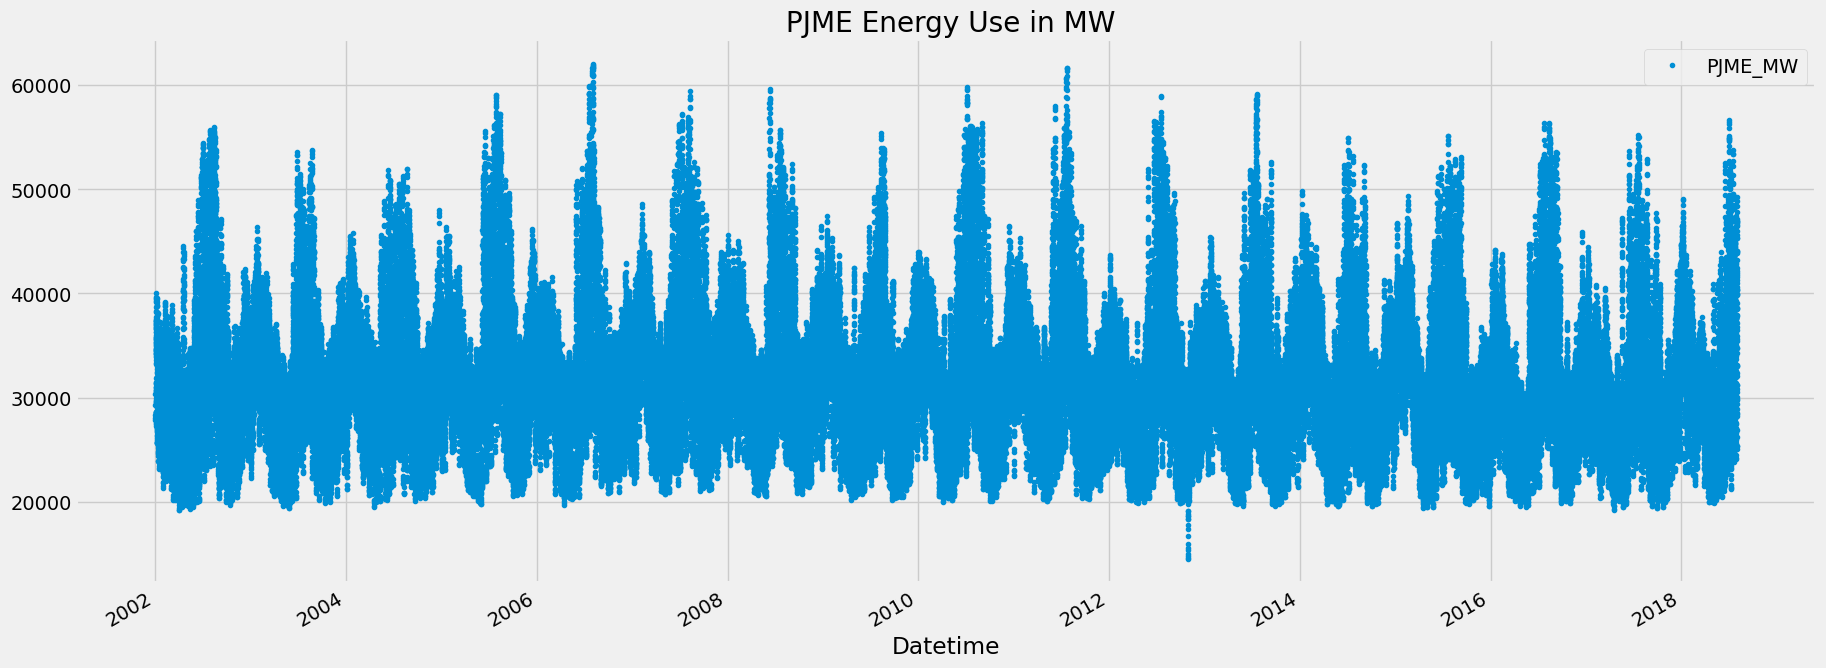

In [6]:
df.plot(style=".",
        figsize=(20,8),
        color=color_pal[0],
        title=" PJME Energy Use in MW" )
plt.show

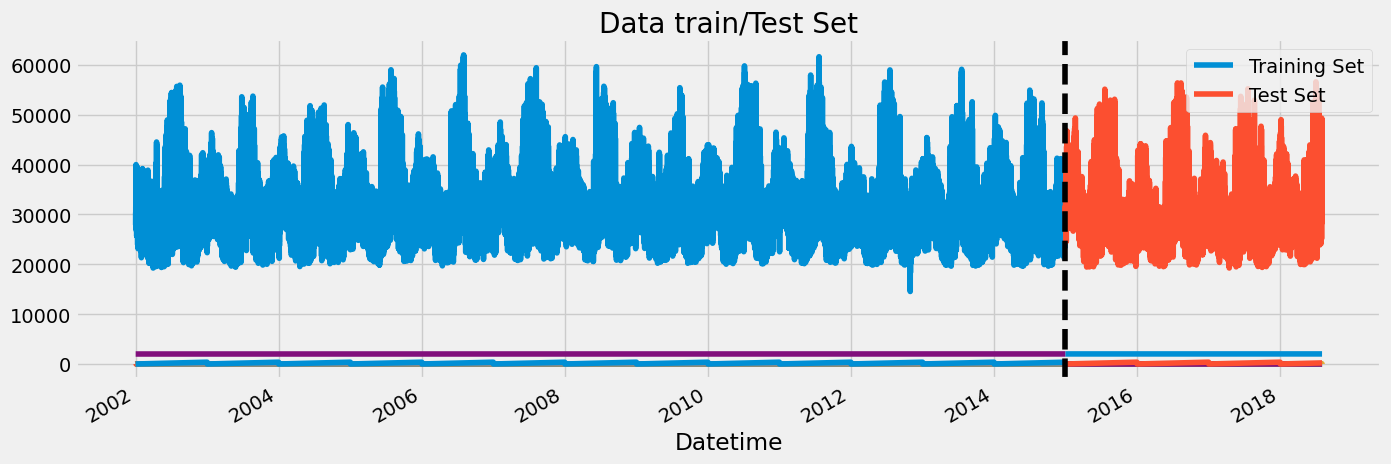

In [11]:
train = df.loc[df.index < "01-01-2015"]
test = df.loc[df.index > "01-01-2015"]


fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label="Training Set" )
test.plot(ax=ax, label="Test Set",title="Data train/Test Set")
ax.axvline("01-01-2015", color="black", ls="dashed")
ax.legend(["Training Set", "Test Set"])
title=(" PJME Energy Use in MW" )
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

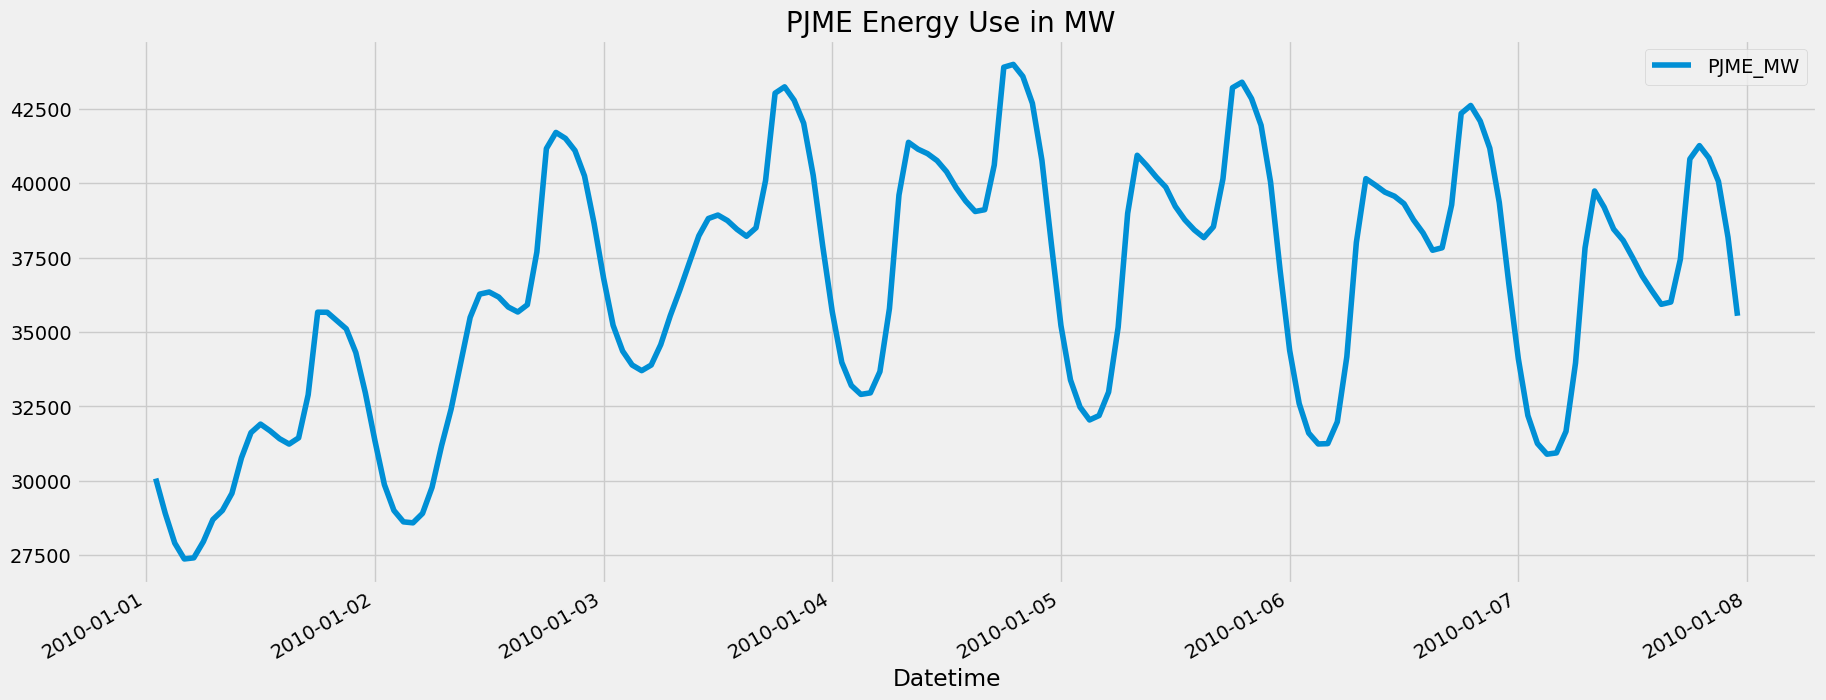

In [37]:
data_1wk = df.loc[(df.index > "01-01-2010") & (df.index < "01-08-2010")]
data_1wk.plot(
        figsize=(20,8),
        color=color_pal[0],
        title=" PJME Energy Use in MW" )
plt.show

In [7]:
def create_features(df):
    df["hour"] = df.index.hour
    df["dayofweek"] = df.index.day_of_week
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["month"] = df.index.month
    df["dayofyear"] = df.index.day_of_year
    df = df.copy()
    return df

In [9]:
df= create_features(df)

In [54]:
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365


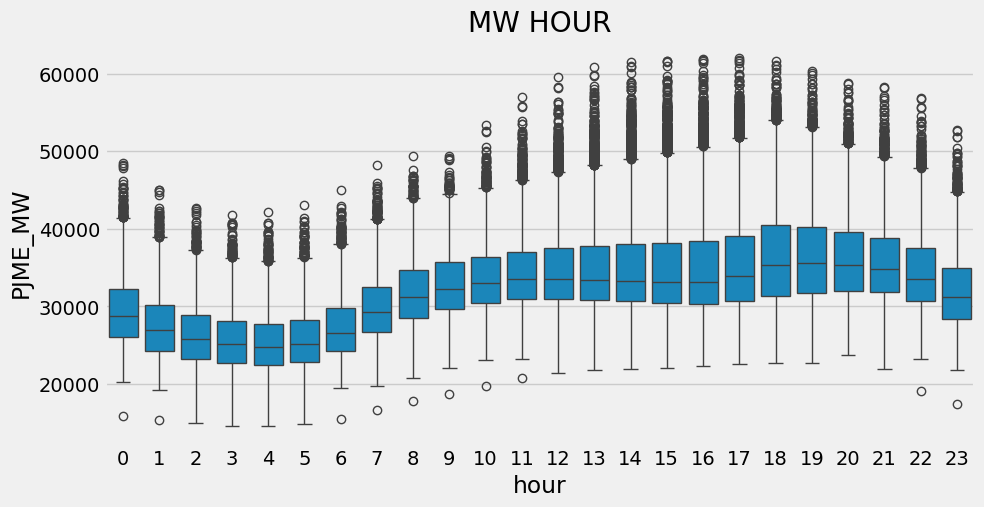

In [45]:
fig , ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df, x="hour", y="PJME_MW")
ax.set_title("MW HOUR")
plt.show()

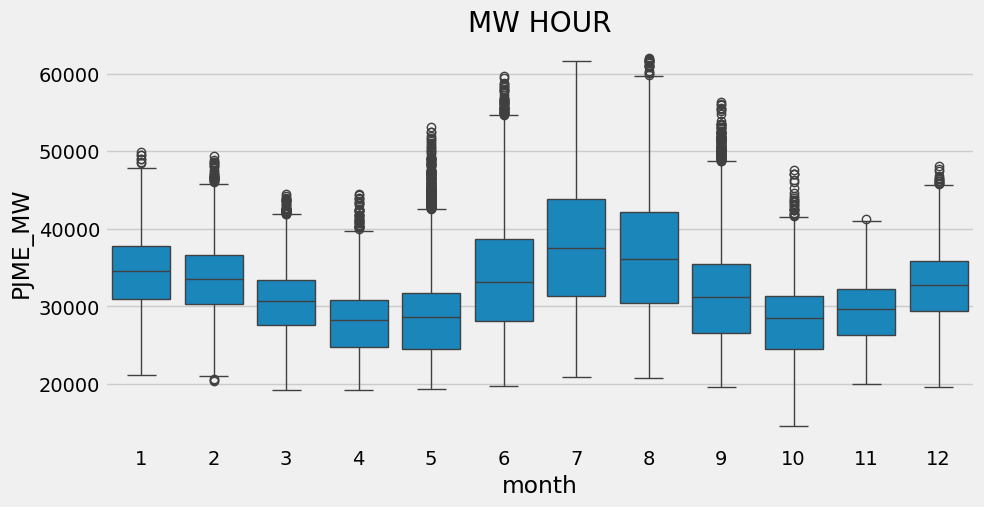

In [55]:
fig , ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df, x="month", y="PJME_MW")
ax.set_title("MW HOUR")
plt.show()

In [36]:
train = create_features(train)
test = create_features(test)

In [13]:
FEATURES= ['hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear']
TARGET = ['PJME_MW']

In [14]:
X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

In [15]:

reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)

In [16]:
from re import VERBOSE
reg.fit(X_train,y_train,
        eval_set= [(X_train, y_train), (X_test,y_test)], verbose = True)

[0]	validation_0-rmse:5179.23300	validation_1-rmse:5359.39460
[1]	validation_0-rmse:4375.01962	validation_1-rmse:4687.07582
[2]	validation_0-rmse:3874.17400	validation_1-rmse:4279.35701
[3]	validation_0-rmse:3572.89245	validation_1-rmse:4082.67331
[4]	validation_0-rmse:3372.17780	validation_1-rmse:3952.60923
[5]	validation_0-rmse:3247.62891	validation_1-rmse:3881.11798
[6]	validation_0-rmse:3162.64310	validation_1-rmse:3856.19279
[7]	validation_0-rmse:3073.82520	validation_1-rmse:3790.19972
[8]	validation_0-rmse:3021.60497	validation_1-rmse:3790.86183
[9]	validation_0-rmse:2967.30458	validation_1-rmse:3762.82916
[10]	validation_0-rmse:2888.42820	validation_1-rmse:3765.44069
[11]	validation_0-rmse:2870.15625	validation_1-rmse:3759.17592
[12]	validation_0-rmse:2813.33663	validation_1-rmse:3779.56942
[13]	validation_0-rmse:2779.04333	validation_1-rmse:3817.62237
[14]	validation_0-rmse:2760.93139	validation_1-rmse:3808.16840
[15]	validation_0-rmse:2739.22479	validation_1-rmse:3797.53465
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

caracteristicas importantes


In [17]:
fi =pd.DataFrame(data=reg.feature_importances_,
                 index= reg.feature_names_in_,
                 columns = ["importance"])

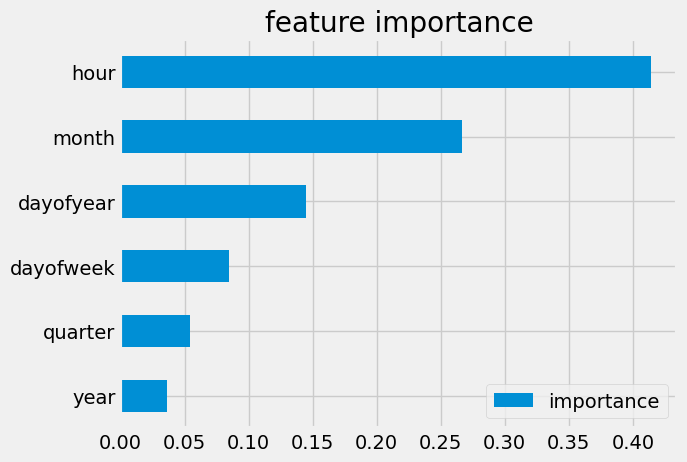

In [18]:
fi.sort_values("importance").plot(kind="barh", title="feature importance")
plt.show()

In [19]:
reg.predict(X_test)

array([28428.975, 27477.4  , 27107.988, ..., 36828.96 , 35005.72 ,
       32497.598], dtype=float32)

In [20]:
test["prediction"] = reg.predict(X_test)

In [27]:
df = df.merge(test[["prediction"]], how="left", left_index = True, right_index=True)

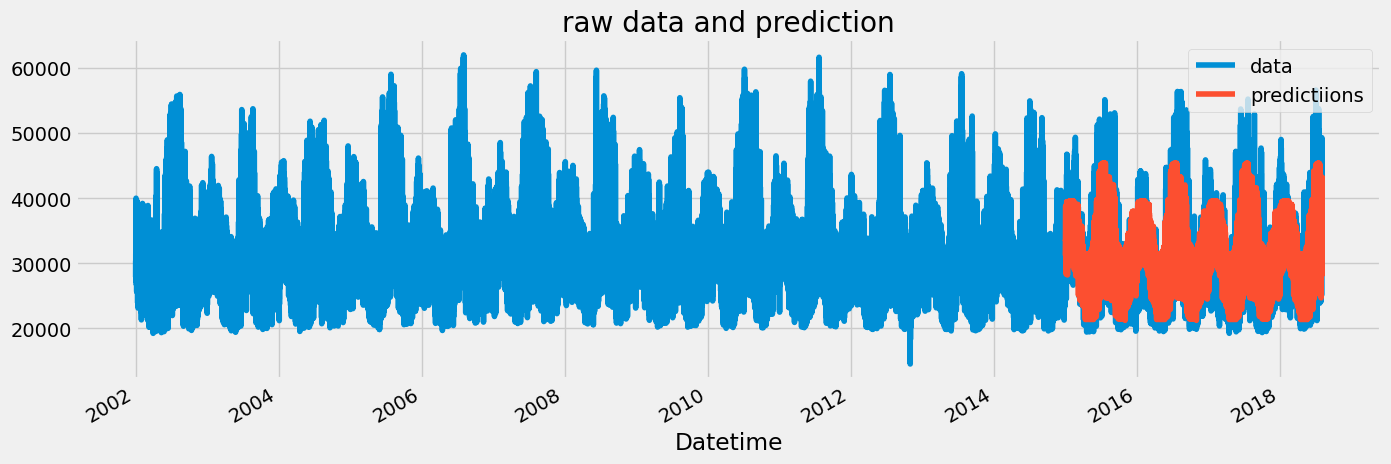

In [36]:
ax = df[["PJME_MW"]].plot(figsize =(15,5))
df["prediction"].plot(ax=ax)
plt.legend(["data", "predictiions"])
ax.set_title("raw data and prediction")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

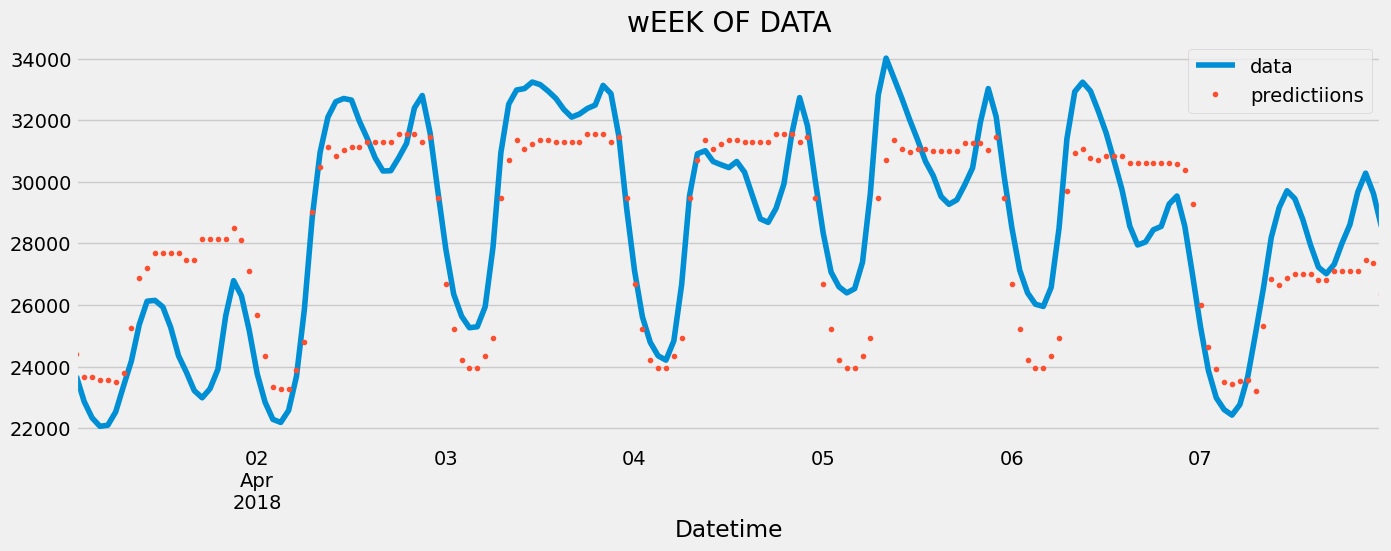

In [37]:
ax = df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]["PJME_MW"]\
          .plot( figsize=(15,5),title="wEEK OF DATA" )
df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]["prediction"]\
    .plot(style=".")
plt.legend(["data", "predictiions"])
plt.show